Accuracy: 1.00


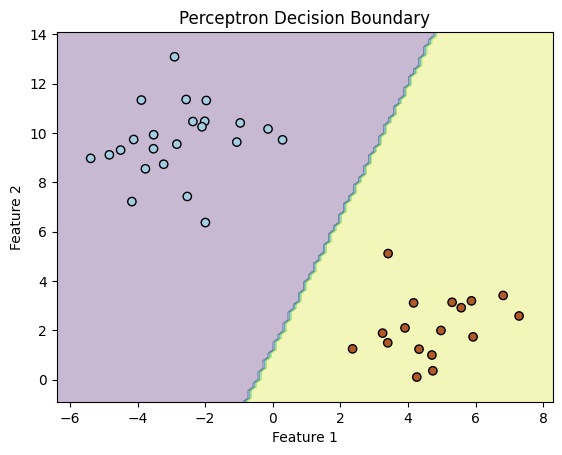

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Generate a dataset with two classes
X, y = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=1.5)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1 for Perceptron

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Perceptron model
perceptron = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
perceptron.fit(X_train, y_train)

# Predictions
y_pred = perceptron.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Perceptron Decision Boundary")
    plt.show()

plot_decision_boundary(perceptron, X_test, y_test)


In [131]:
import pandas as pd

In [132]:
df=pd.read_csv("accident.csv")

In [133]:
df

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


In [134]:
df["Gender"].value_counts()

Gender
Female    110
Male       89
Name: count, dtype: int64

In [135]:
len(df)

200

In [136]:
df["helmat_num"]=df["Helmet_Used"].apply(lambda x:0 if x=='No' else 1)
df["seatbelt_num"]=df["Seatbelt_Used"].apply(lambda x:0 if x=='No' else 1)
df["Gender_num"]=df["Gender"].apply(lambda x:0 if x=='Female' else 1)

In [137]:
df["helmat_num"].value_counts()

helmat_num
1    111
0     89
Name: count, dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
 6   helmat_num       200 non-null    int64  
 7   seatbelt_num     200 non-null    int64  
 8   Gender_num       200 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 14.2+ KB


In [139]:
df[df["Gender"].isnull()==True]

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived,helmat_num,seatbelt_num,Gender_num
30,66,NaN,72.0,No,Yes,0,0,1,1


In [140]:
df.dropna()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived,helmat_num,seatbelt_num,Gender_num
0,56,Female,27.0,No,No,1,0,0,0
1,69,Female,46.0,No,Yes,1,0,1,0
2,46,Male,46.0,Yes,Yes,0,1,1,1
3,32,Male,117.0,No,Yes,0,0,1,1
4,60,Female,40.0,Yes,Yes,0,1,1,0
...,...,...,...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1,0,1,0
196,30,Female,51.0,No,Yes,1,0,1,0
197,58,Male,110.0,No,Yes,1,0,1,1
198,20,Male,103.0,No,Yes,1,0,1,1


In [141]:
df.iloc[30]

Age                  66
Gender              NaN
Speed_of_Impact    72.0
Helmet_Used          No
Seatbelt_Used       Yes
Survived              0
helmat_num            0
seatbelt_num          1
Gender_num            1
Name: 30, dtype: object

In [145]:
newdf=df.drop(columns=["Helmet_Used","Seatbelt_Used","Gender"])

In [146]:
newdf

,Age,Speed_of_Impact,Survived,helmat_num,seatbelt_num,Gender_num
0,56,27.0,1,0,0,0
1,69,46.0,1,0,1,0
2,46,46.0,0,1,1,1
3,32,117.0,0,0,1,1
4,60,40.0,0,1,1,0
...,...,...,...,...,...,...
195,69,111.0,1,0,1,0
196,30,51.0,1,0,1,0
197,58,110.0,1,0,1,1
198,20,103.0,1,0,1,1


In [156]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              197 non-null    int64  
 1   Speed_of_Impact  197 non-null    float64
 2   Survived         197 non-null    int64  
 3   helmat_num       197 non-null    int64  
 4   seatbelt_num     197 non-null    int64  
 5   Gender_num       197 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 10.8 KB


In [157]:
newdf=newdf.dropna(axis=0)

In [172]:
trdf=newdf.drop(columns=["Survived"])

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Generate a dataset with two classes
X=newdf
y = newdf["Survived"] # Convert labels to -1 and 1 for Perceptron

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=42)

# Train the Perceptron model
# perceptron = Perceptron(max_iter=1000,random_state=42)
perceptron = Perceptron(max_iter=1000, random_state=42)

perceptron.fit(X_train, y_train)

# Predictions
y_pred = perceptron.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.49


In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = np.sign(linear_output)
                
                # Update weights if the prediction is incorrect
                if y_pred != y[idx]:
                    self.weights += self.lr * y[idx] * x_i
                    self.bias += self.lr * y[idx]
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

# Example usage
if __name__ == "__main__":
    # Toy dataset (AND gate logic)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([-1, -1, -1, 1])  # -1 for 0, 1 for 1

    perceptron = Perceptron(learning_rate=0.1, epochs=10)
    perceptron.fit(X, y)
    
    print("Predictions:", perceptron.predict(X))
    print("Final weights:", perceptron.weights)
    print("Final bias:", perceptron.bias)


Predictions: [-1. -1. -1.  1.]
Final weights: [0.2 0.1]
Final bias: -0.20000000000000004
